In [1]:
import torch
torch.manual_seed(10)
torch.set_printoptions(precision=2)

from model import Model
import matplotlib.pyplot as plt
import torchvision.transforms as T 
from PIL import Image
from torch.profiler import profile, record_function, ProfilerActivity

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

/idiap/temp/sshetty/miniconda/envs/pyml/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Matplotlib created a temporary config/cache directory at /tmp/matplotlib-lui_1u59 because the default path (/idiap/home/sshetty/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


cuda


In [2]:


model = Model(net=6,m=50,lr=0.005,bs=500,device=device)

path_train = '../data/train_data.pkl'
path_val = '../data/val_data.pkl'

noisy_imgs_1, noisy_imgs_2 = torch.load(path_train)
# noisy_imgs_1 = noisy_imgs_1#[:10000]
# noisy_imgs_2 = noisy_imgs_2#[:10000]

noisy_imgs , clean_imgs = torch.load(path_val)
# noisy_imgs = noisy_imgs.float()/256
# clean_imgs = clean_imgs.float()/256


In [3]:
noisy_imgs_1.shape[0]

50000

In [4]:
model.train(noisy_imgs_1, noisy_imgs_2, 50)
out = model.predict(noisy_imgs)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [08:06<00:00,  9.72s/it]


In [5]:
# def psnr(denoised, ground_truth):
#     mse = torch.mean(torch.mean((denoised-ground_truth)**2,dim=(1,2,3)))
#     return -10 * torch.log10(mse + 10**(-8))

# psnr(out.cpu().float()/256, clean_imgs.float()/256)

In [26]:
def compute_psnr(x, y, max_range=1.0):
    assert x.shape == y.shape and x.ndim == 4
    return 20 * torch.log10(torch.tensor(max_range)) - 10 * torch.log10(((x-y)**2).mean((1,2,3))).mean()
print("psnr: ", compute_psnr(out.cpu().float()/256, clean_imgs.float()/256))
def compute_psnr_all(x, y, max_range=1.0):
    assert x.shape == y.shape and x.ndim == 4
    return 20 * torch.log10(torch.tensor(max_range)) - 10 * torch.log10(((x-y)**2).mean((1,2,3)))
psnrs = torch.round(compute_psnr_all(out.cpu().float()/256, clean_imgs.float()/256), decimals=2)

psnr:  tensor(25.44)


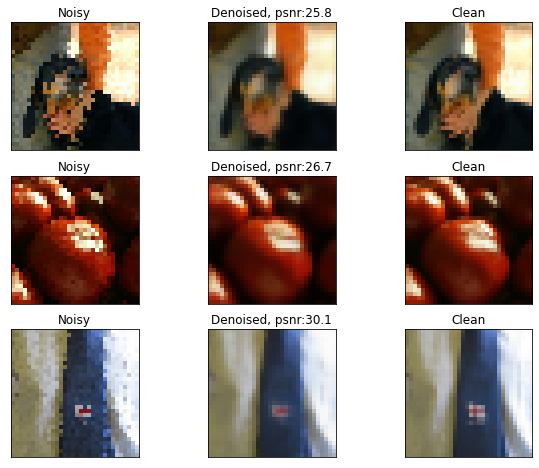

In [47]:
transform = T.ToPILImage()
k_all = [15,99,39]

plt.figure(figsize = [10, 8])
k = k_all[0]
plt.subplot(3, 3,1)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Noisy")
plt.imshow(transform(noisy_imgs[k]));
plt.subplot(3, 3,2)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Denoised, psnr:{:.1f}".format(psnrs[k]))

plt.imshow(transform(out[k]/256));
plt.subplot(3, 3,3)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Clean")
plt.imshow(transform(clean_imgs[k]));

k=k_all[1]
plt.subplot(3, 3,4)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Noisy")
plt.imshow(transform(noisy_imgs[k]));
plt.subplot(3, 3,5)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Denoised, psnr:{:.1f}".format(psnrs[k]))

plt.imshow(transform(out[k]/256));
plt.subplot(3, 3,6)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Clean")
plt.imshow(transform(clean_imgs[k]));

k = k_all[2]
plt.subplot(3, 3,7)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Noisy")
plt.imshow(transform(noisy_imgs[k]));
plt.subplot(3, 3,8)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Denoised, psnr:{:.1f}".format(psnrs[k]))

plt.imshow(transform(out[k]/256));
plt.subplot(3, 3,9)
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Clean")
plt.imshow(transform(clean_imgs[k]));

# plt.savefig("results_denoised_7.png", pad_inches=0.01,dpi=300)


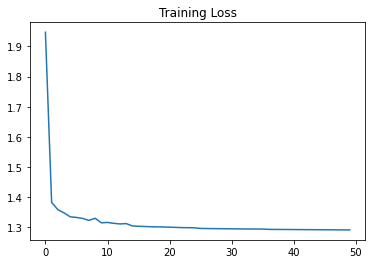

In [48]:
# import matplotlib.pyplot as plt
# plt.plot(model.loss_train.detach().cpu())
# plt.title("Training Loss")
# plt.savefig('loss_train_.png', dpi=300, pad_inches=0.01 )

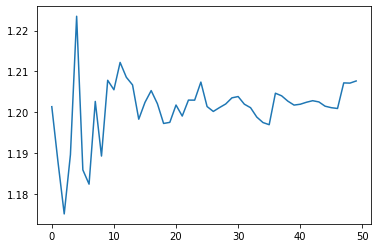

In [10]:
plt.plot(model.loss_valid.detach().cpu())

In [49]:
results = torch.load('Net-6.pickle')

In [50]:
results

{'psnr': [[tensor(24.59),
   tensor(24.50),
   tensor(24.54),
   tensor(24.65),
   tensor(24.62),
   tensor(24.56)],
  [tensor(24.68),
   tensor(24.77),
   tensor(24.72),
   tensor(24.94),
   tensor(24.95),
   tensor(24.74)],
  [tensor(24.54),
   tensor(24.83),
   tensor(24.85),
   tensor(24.96),
   tensor(25.08),
   tensor(25.01)],
  [tensor(6.46),
   tensor(6.46),
   tensor(6.46),
   tensor(6.46),
   tensor(6.46),
   tensor(6.46)]],
 'bs': [10, 50, 100, 250, 500, 1000],
 'm': [10, 25, 50, 100],
 'best_m': 50,
 'best_bs': 500,
 'lr_all': [0.1, 0.05, 0.02, 0.01, 0.008, 0.005, 0.001],
 'psnr_lr': [tensor(6.46),
  tensor(6.46),
  tensor(6.46),
  tensor(25.13),
  tensor(25.33),
  tensor(25.31),
  tensor(25.29)],
 'best_lr': 0.008,
 'best_psnr': tensor(25.38),
 'loss_train': [[tensor([68.99], device='cuda:0'),
   tensor([14.48, 13.56], device='cuda:0'),
   tensor([7.92, 6.88, 6.79], device='cuda:0'),
   tensor([3.82, 2.80, 2.76, 2.74, 2.72, 2.72, 2.72], device='cuda:0'),
   tensor([2.09, 1